In [12]:
#import packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [13]:
#upload dataset from user file, where python is stored
address = 'vgsales.csv'
vgsales = pd.read_csv(address)
vgsales.columns = ['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'naSales', 'euSales', 'jpSales', 
                   'otherSales', 'globalSales']
vgsales.head(20)

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [14]:
vgsales.info()
# categorical variables: name, platform, year, genre, publisher
#categorical count: 5
# numerical variables: rank, naSales, euSales, jpSales, otherSales, globalSales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         16598 non-null  int64  
 1   name         16598 non-null  object 
 2   platform     16598 non-null  object 
 3   year         16327 non-null  float64
 4   genre        16598 non-null  object 
 5   publisher    16540 non-null  object 
 6   naSales      16598 non-null  float64
 7   euSales      16598 non-null  float64
 8   jpSales      16598 non-null  float64
 9   otherSales   16598 non-null  float64
 10  globalSales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
vgsales.describe()

,rank,year,naSales,euSales,jpSales,otherSales,globalSales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [16]:
#check the numerical attributes for 0 value
numMissing = (vgsales[['year', 'naSales', 'euSales', 'jpSales', 
                   'otherSales', 'globalSales']] == 0).sum()
print(numMissing)

year               0
naSales         4499
euSales         5730
jpSales        10455
otherSales      6477
globalSales        0
dtype: int64


In [18]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
sb.set_style('whitegrid')

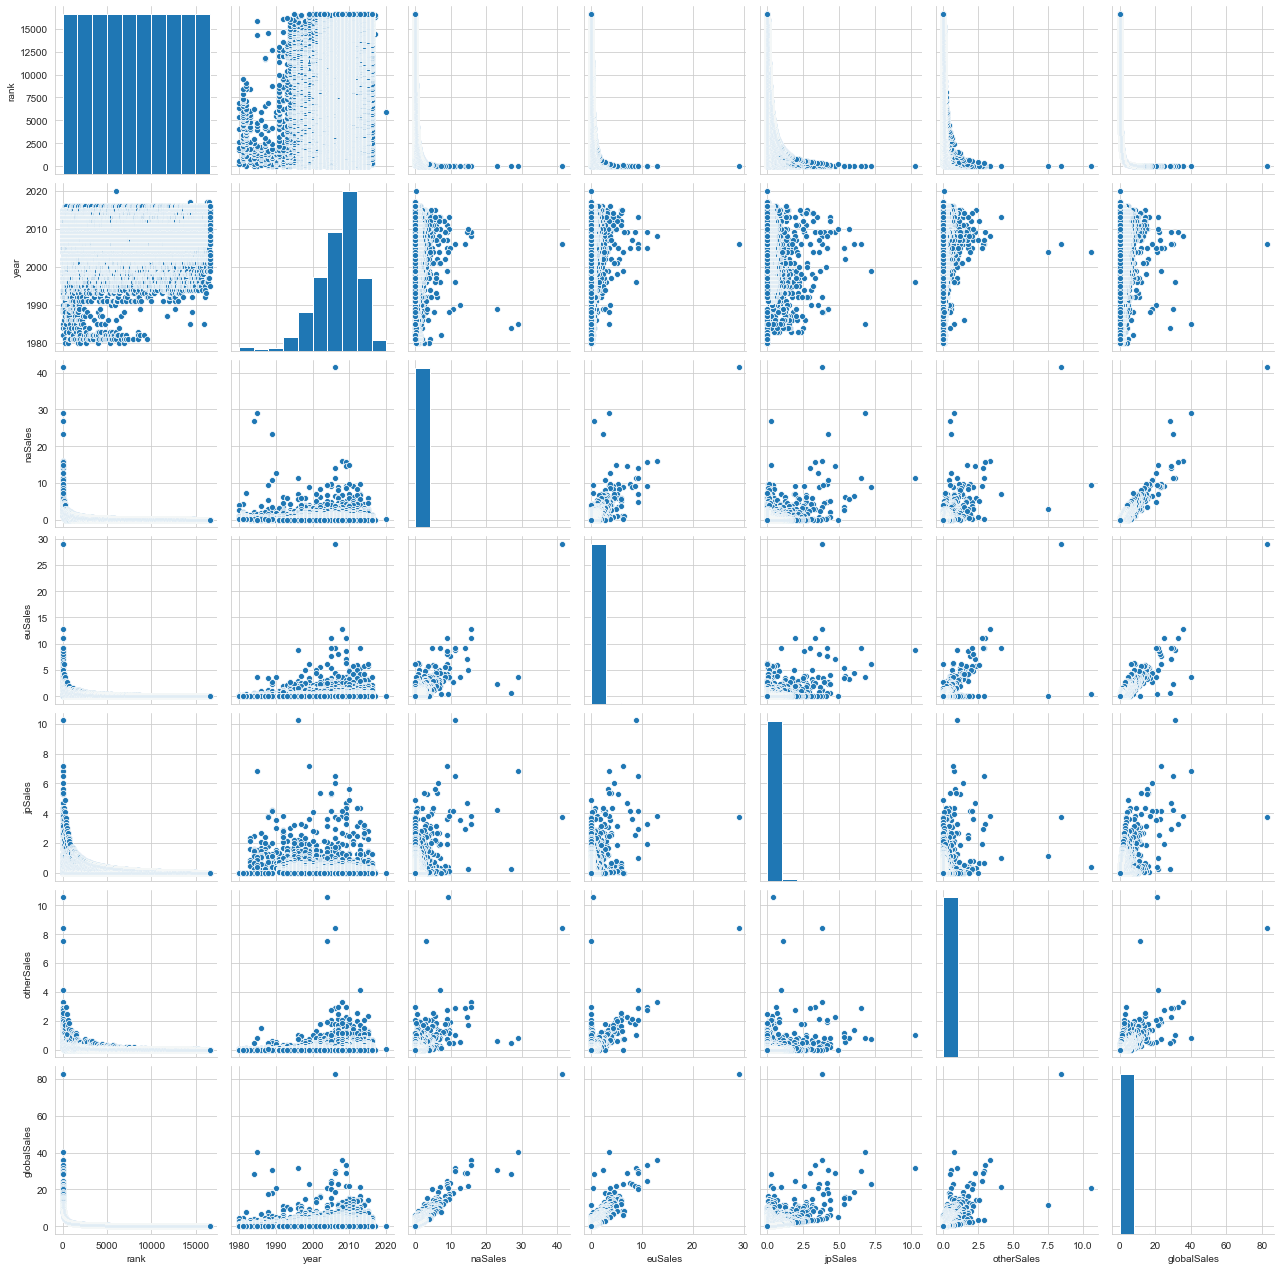

In [22]:
#create pairplot of vgsales
sb.pairplot(vgsales)